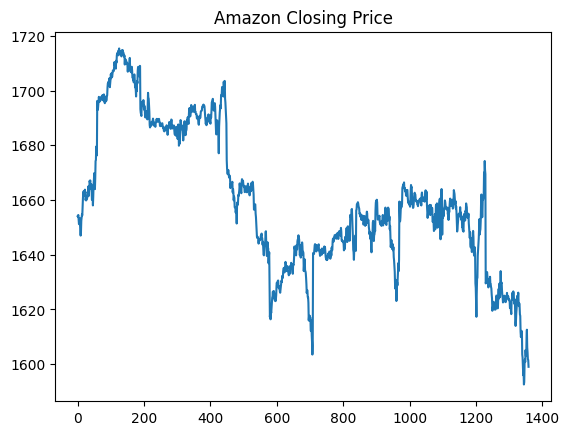

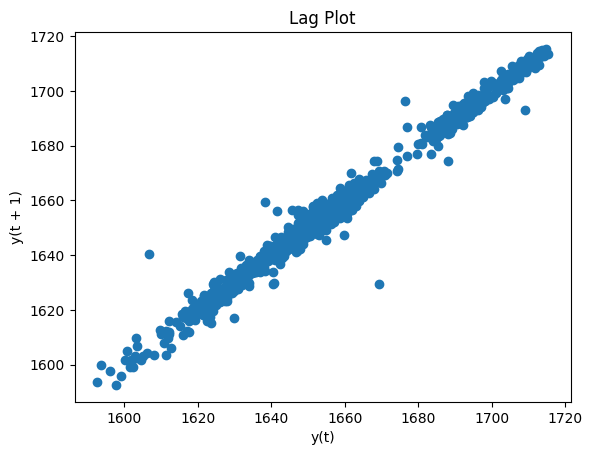

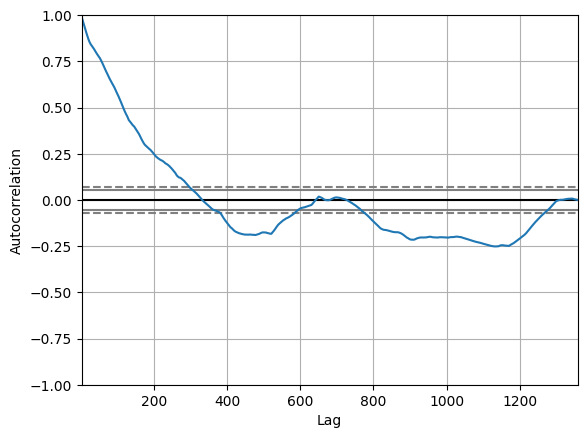

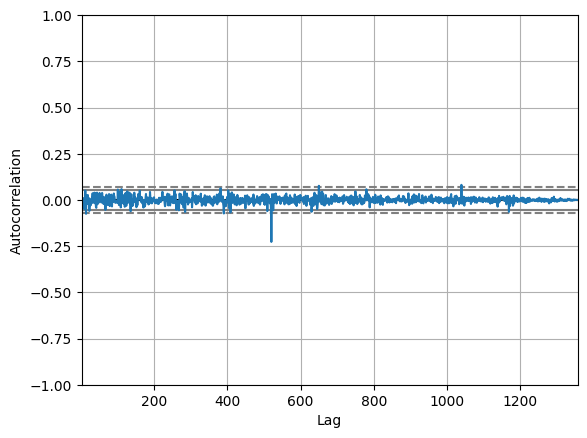

In [7]:
# https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
%matplotlib inline

import pandas
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

import statsmodels
import statsmodels.api as sm


df_amzn = pandas.read_excel('amzn.xlsx')
close_amzn = df_amzn['Close']


plt.plot(close_amzn)
plt.title('Amazon Closing Price')
plt.show()

lag_plot(close_amzn)
plt.title('Lag Plot')
plt.show()

autocorrelation_plot(close_amzn)
plt.show()

autocorrelation_plot(np.diff(np.log(close_amzn)))
plt.show()


# Auto-Regressive Models

**Definition: AR(p) model**

The random process $y_t$ is AR(p) if 

$$y_t = c + \phi_1 y_{t-1} + ... + \phi_p y_{t-p} + \epsilon_t$$

where $\epsilon_t \sim N(0, \sigma^2)$

##### AR(2) MODEL #####
Coefficients: [9.38180027e+00 9.86680196e-01 7.68307079e-03]


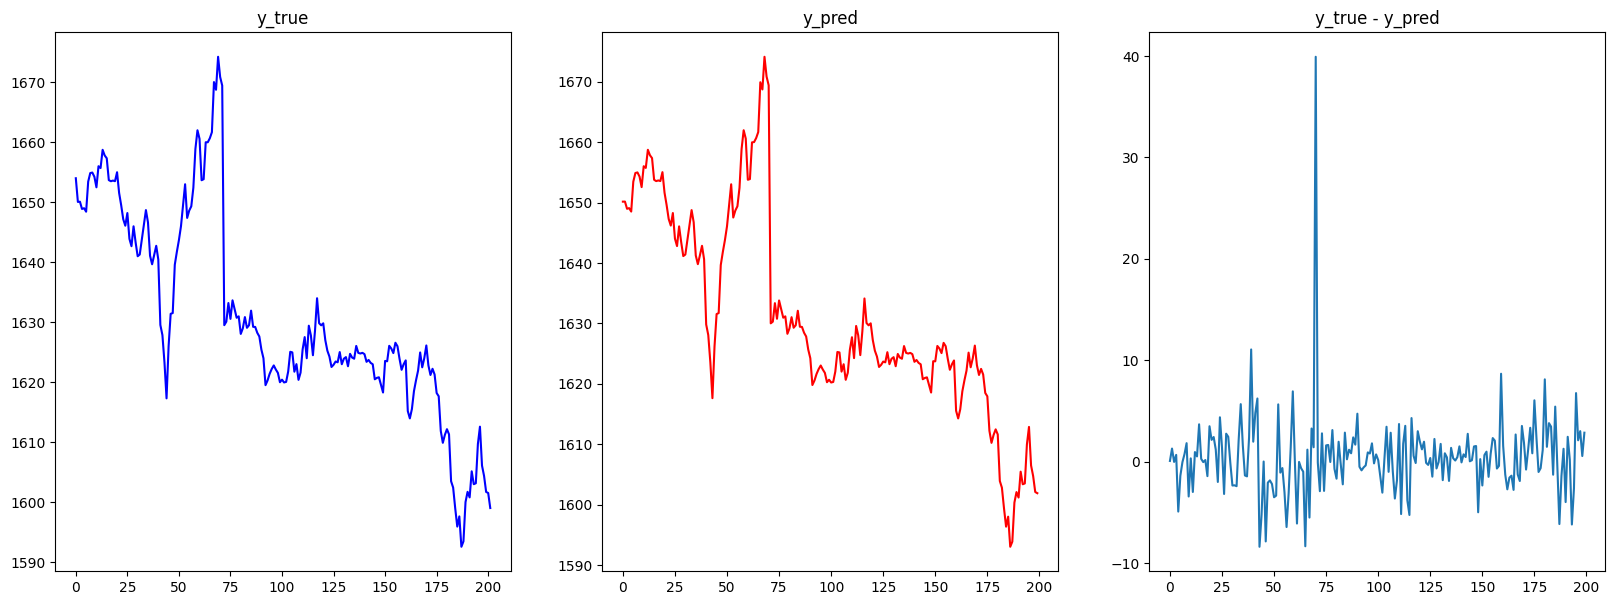

In [52]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# data
X = close_amzn.values

# split dataset
train, test = X[1:len(X)-200], X[len(X)-200:]

# train AR(2) model
window = 2 
model = AutoReg(train, window)
model_fit = model.fit()
coef = model_fit.params

# walk forward predicting y_{t+1}
history = train[len(train)-window:].tolist() # -2 => y_1 can be predicted 
fittedvalues = list()
for t in range(len(test)):
    # get {y_{t-i}|i in p} 
    lagged = history[-window:][::-1] # orders lagged values to correspond to coefs
    lagged_intercept = np.insert(lagged, 0, 1) #  adds intercept
    
    y_pred = np.sum(lagged_intercept * coef) # makes prediction
    y_true = test[t]
    
    fittedvalues.append(y_pred)
    history.append(y_true)
    
print(f'##### AR({window}) MODEL #####')
print('Coefficients: %s' % model_fit.params)

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey=False, figsize=(20, 7))

ax1.set_title('y_true')
ax1.plot(history, color='blue')

ax2.set_title('y_pred')
ax2.plot(fittedvalues, color='red')

ax3.set_title('y_true - y_pred')
ax3.plot(np.array(fittedvalues) - np.array(history[2:]))

plt.show()

In [53]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = close_amzn

window =100
train, test = X[window:len(X)-200], X[len(X)-200:]

# train autoregression
model = statsmodels.tsa.ar_model.AutoReg(train, window)
model_fit = model.fit()

print('Lag: %s' % window)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.forecast(steps=len(test))
error = mean_squared_error(test,predictions)
print('Test MSE: %.3f' % error)

Lag: 100
Coefficients: const         12.118846
Close.L1       0.998569
Close.L2      -0.082166
Close.L3       0.053336
Close.L4       0.040671
                ...    
Close.L96     -0.029655
Close.L97      0.064101
Close.L98     -0.029224
Close.L99     -0.019745
Close.L100     0.012837
Length: 101, dtype: float64
Test MSE: 712.100


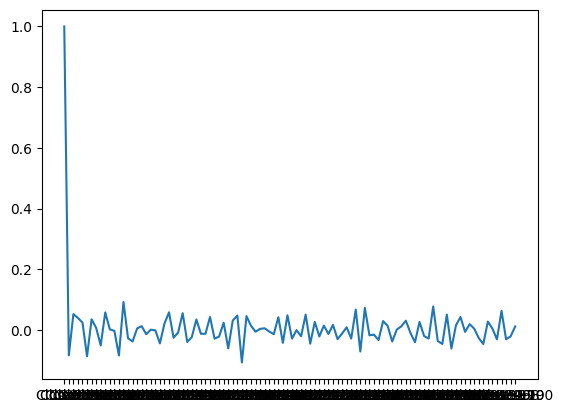

In [56]:
plt.plot(model_fit.params[1:])